# Create Plots for Michigan State vs Opponents using the Master Roster 2023 file

In [34]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns


path = '../../data/rosters/2023_master_roster.csv'

# Read in CSV
df = pd.read_csv(path)

# Image Paths to be used in the plot
# Load logos
msu_logo = plt.imread('../../images/logos/msu.png')
bc_logo = plt.imread('../../images/logos/bc_.png')

team_colors = {'Michigan-State': 'darkgreen', 'Boston-College': 'maroon'}


font_title_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 28}
font_label_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'bold', 'size': 16}
font_tick_param = {'family': 'sans-serif', 'color': 'darkslategray', 'weight': 'normal', 'size': 20}

### SET THE FIGURE SIZE OF THE CHARTS ###
fig_deafult_1 = (12, 8) # Original
fig_deafult_2 = (12, 10)
# figure_size = fig_deafult_1
figure_size = fig_deafult_2


# Load Background Image

bg_img = plt.imread('../../images/backgrounds/bc1.png') # Square Image
bg_wide_img = plt.imread('../../images/backgrounds/wide1.png') # Wide Image
# # Set Aplha Level of Background Image
aplha_val = 0.1



## Create Three Plots of the Height Data
- Density Plot: Shows the smoothed frequency distribution of height for each position.
- Strip Plot with Jitter: Individual data points for height are spread across each position, with jitter added to better differentiate closely packed points.
- Box Plot with Swarm: Combines a box plot showing summary statistics with individual data points.

In [35]:
# # Create subplots for Density Plot, Strip Plot with Jitter, and Box Plot with Swarm
# fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# # --- Density Plot for Height by Position ---
# sns.kdeplot(data=df, x='Height_Inches', hue='Position', common_norm=False, ax=axes[0], fill=True)
# axes[0].set_title('Density Plot for Height by Position')
# axes[0].set_xlabel('Height (inches)')
# axes[0].set_ylabel('Density')

# # --- Strip Plot with Jitter for Height by Position ---
# sns.stripplot(x='Position', y='Height_Inches', data=df, jitter=True, alpha=0.5, ax=axes[1])
# axes[1].set_title('Strip Plot with Jitter for Height by Position')
# axes[1].set_xlabel('Position')
# axes[1].set_ylabel('Height (inches)')

# # --- Box Plot with Swarm for Height by Position ---
# sns.boxplot(x='Position', y='Height_Inches', data=df, color='lightgrey', showfliers=False, ax=axes[2])
# sns.swarmplot(x='Position', y='Height_Inches', data=df, color='black', alpha=0.5, ax=axes[2])
# axes[2].set_title('Box Plot with Swarm for Height by Position')
# axes[2].set_xlabel('Position')
# axes[2].set_ylabel('Height (inches)')

# plt.tight_layout()
# plt.show()


## Box Plot with Swarm:
### Combines a box plot showing summary statistics with individual data points.

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 42.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_5092\3504982376.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param) # X axis
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\

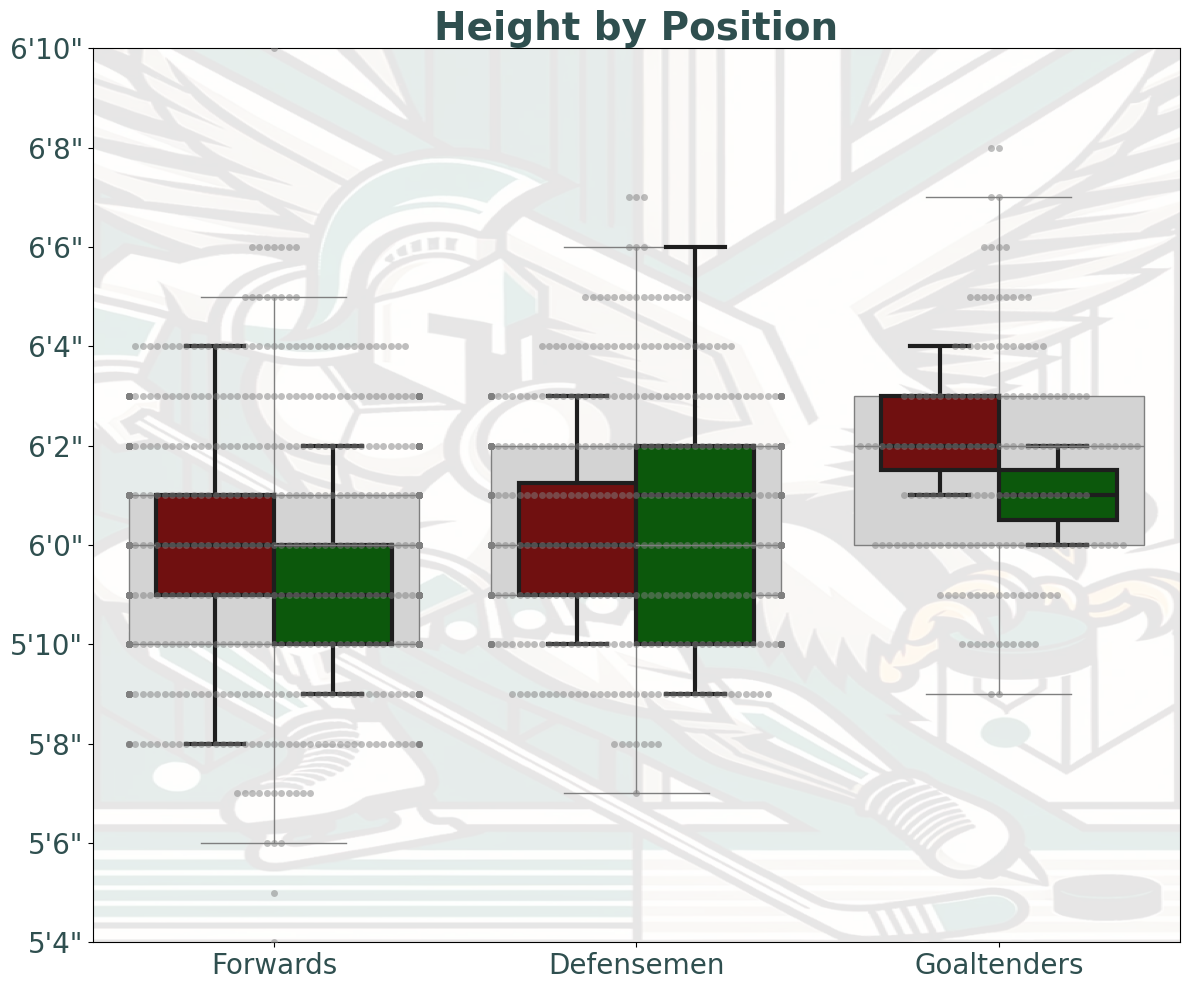

In [36]:
# Set the order of the positions
position_order = ['Forwards', 'Defensemen', 'Goaltenders']

df_filtered = df[(df['School'] == 'Michigan-State') | (df['School'] == 'Boston-College')]



# Create a subplot for the Box Plot with Swarm for height, grouped by Class Year
fig, ax = plt.subplots(1, 1, figsize=figure_size)

# # Set Axis ranges
ax.set_xlim([0, 3])

######### New Background Image #########
# Get the current x and y limits of the data
x_range = ax.get_xlim()

## y Limit based on the data
y_min = df['Height_Inches'].min()
y_max = df['Height_Inches'].max()

## Insert the background image
ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=aplha_val, zorder=0)


# Create the base Box Plot with Swarm using the entire dataset for height
sns.boxplot(x='Position', y='Height_Inches', data=df, color='lightgrey', showfliers=False, ax=ax, order=position_order)
sns.swarmplot(x='Position', y='Height_Inches', data=df, color='grey', alpha=0.5, ax=ax, order=position_order)

# Create a box plot for each team to overlay on the base box plot
sns.boxplot(x='Position', y='Height_Inches', data=df_filtered, hue='School', ax=ax, palette=team_colors, 
            showfliers=False, order=position_order, width=0.65,
            # make the block and wishker lines thicker
            linewidth=3,
            )



# # Create a filtered dataframe for Michigan State and Boston College
# df_filtered = df[(df['School'] == 'Michigan-State') | (df['School'] == 'Boston-College')]

# Add title and labels
ax.set_title('Height by Position', fontdict=font_title_param)
# ax.set_xlabel('Position', fontdict=font_label_param)
ax.set_ylabel('Height', fontdict=font_label_param)

# Remove the legend
ax.get_legend().remove()

# add tick marks back to the y axis
ax.set_yticks(ax.get_yticks())

# set the tick parameters
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param) # X axis
# ax.set_yticklabels(ax.get_yticks(), fontdict=font_tick_param) # Y axis

# Convert the tick mark labels to feet and inches and only use whole values like 6'1"
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()], fontdict=font_tick_param)


# Remove label from x axis
# ax.set_xlabel('')
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)

# Title for the plot
title = 'Height_by_Position'

# Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
TEMP_FOLDER = '../../TEMP/'
plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()


## Height by Class Rank

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 44.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 44.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\

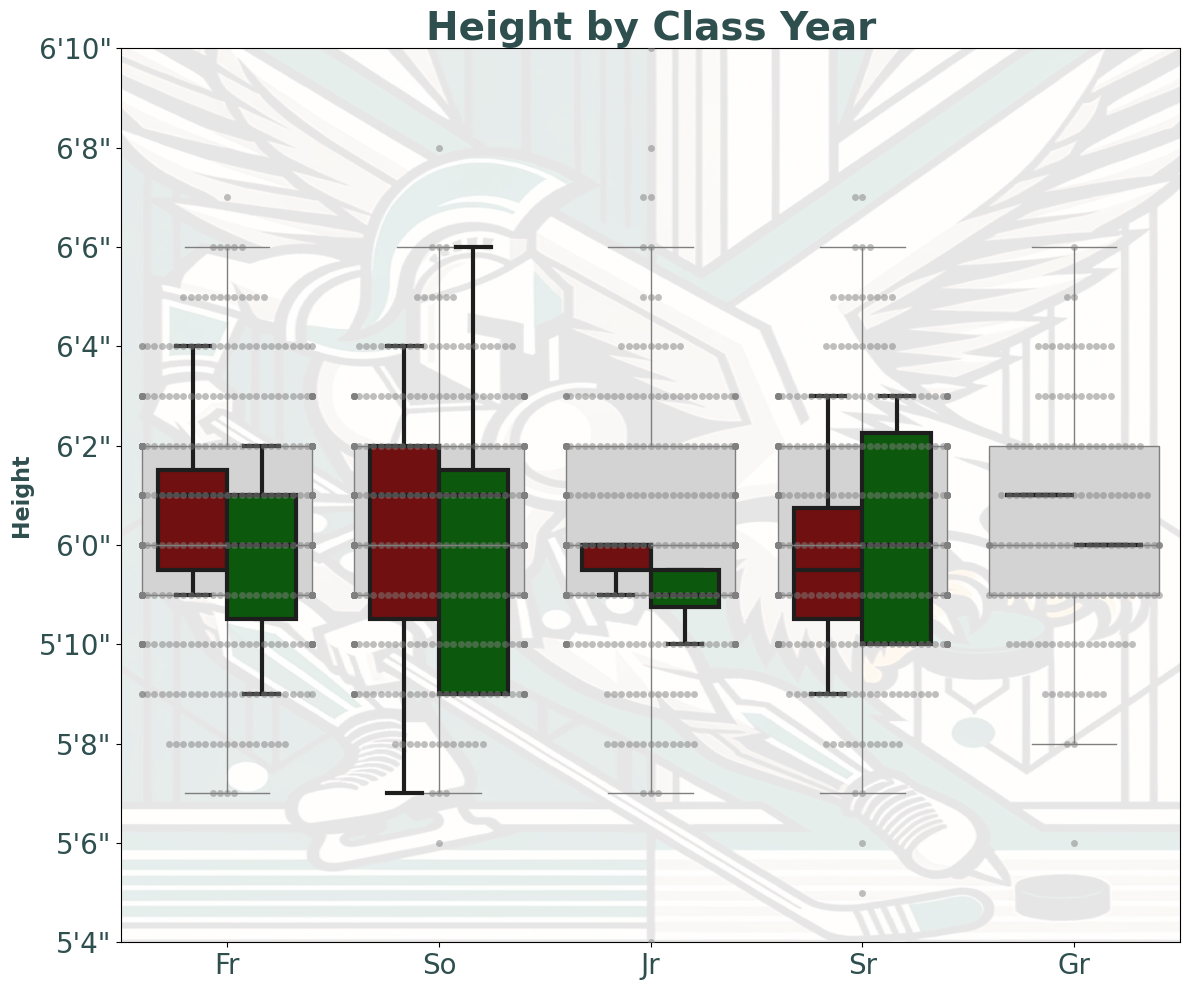

In [37]:
# Set the order of the class years
class_order = ['Fr', 'So', 'Jr', 'Sr', 'Gr']


# Create a subplot for the Box Plot with Swarm for height, grouped by Class Year
fig, ax = plt.subplots(1, 1, figsize=figure_size)

# # Set Axis ranges
ax.set_xlim([0, 5])

######### New Background Image #########
# Get the current x and y limits of the data
x_range = ax.get_xlim()
## y Limit based on the data
y_min = df['Height_Inches'].min()
y_max = df['Height_Inches'].max()

## Insert the background image
ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=aplha_val, zorder=0)


# Create the base Box Plot with Swarm using the entire dataset for height
sns.boxplot(x='Yr.', y='Height_Inches', data=df, color='lightgrey', showfliers=False, ax=ax, order=class_order)
sns.swarmplot(x='Yr.', y='Height_Inches', data=df, color='grey', alpha=0.5, ax=ax, order=class_order)

# Create a box plot for Michigan State and Boston College to overlay on the base box plot
sns.boxplot(x='Yr.', y='Height_Inches', data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=class_order, width=0.65,
            # make the block and wishker lines thicker
            linewidth=3
            )

# Convert the tick mark labels to feet and inches and only use whole values like 6'1"
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels([f'{int(tick // 12)}\'{int(tick % 12)}"' for tick in ax.get_yticks()])

# Add title and labels
ax.set_title('Height by Class Year', fontdict=font_title_param)
# ax.set_xlabel('Class Year', fontdict=font_label_param)
ax.set_ylabel('Height', fontdict=font_label_param)
# Adjust tick parameters
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param) # X axis
ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param) # Y axis

ax.get_legend().remove()

# Remove label from x axis
ax.set_xlabel('')

# Title for the plot
title = 'Height_by_Class_Year'

# Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
# TEMP_FOLDER = '../TEMP/'
plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()


## Weight By Position

c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_5092\3246789625.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param) # X axis
C:\Users\Justin\AppData\Local\Temp\ipykernel_5092\3246789625.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontdict=

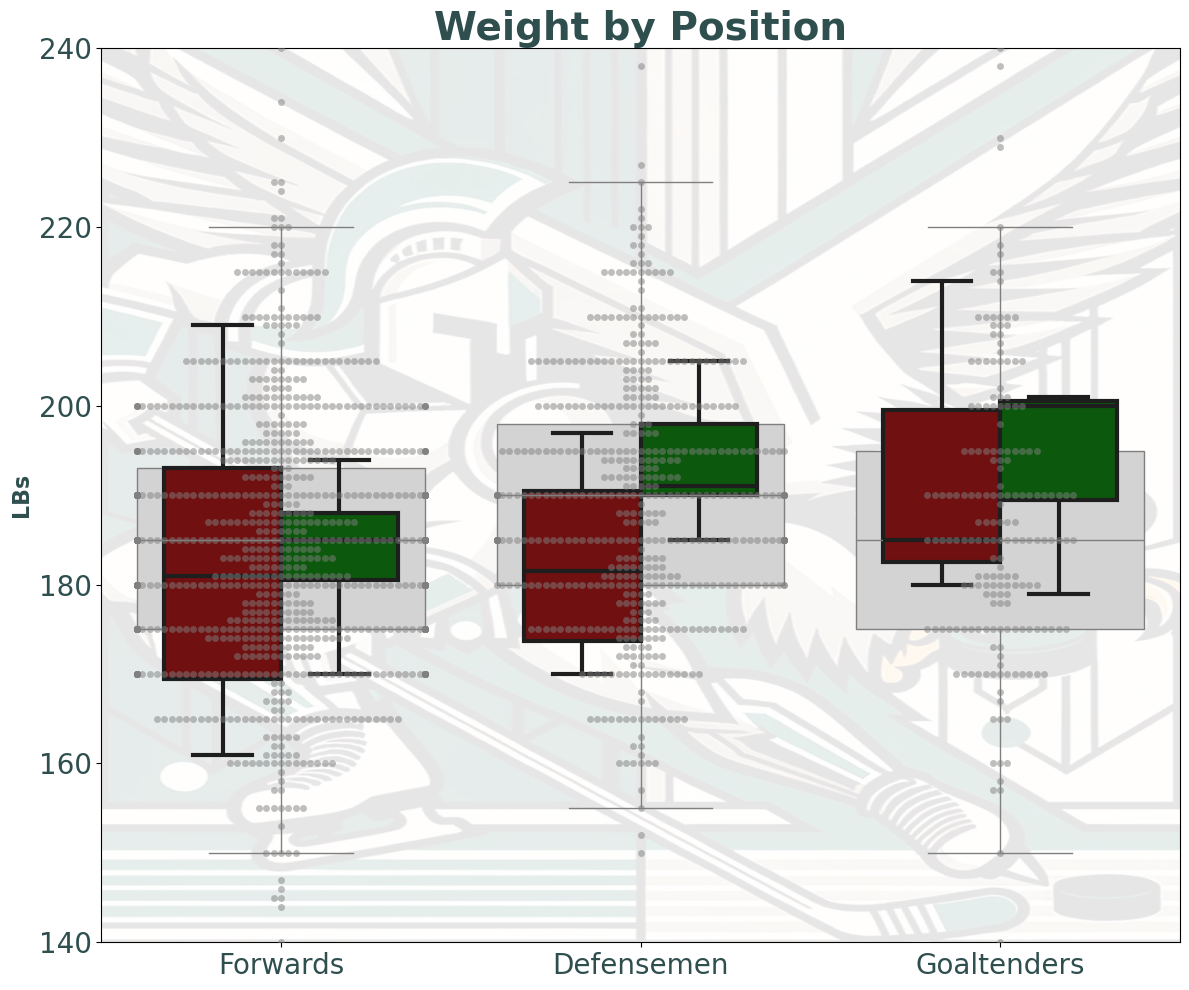

In [38]:
# # Create a subplot for the Box Plot with Swarm for weight, grouped by Position

fig, ax = plt.subplots(1, 1, figsize=figure_size)

# Set Axis ranges
ax.set_xlim([0, 3])
# ax.set_ylim([140, 250])

######### New Background Image #########
# Get the current x and y limits of the data
x_range = ax.get_xlim()
## y Limit based on the data
y_min = df['Wt.'].min()
y_max = df['Wt.'].max()

## Insert the background image
ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=aplha_val, zorder=0)

# Create the base Box Plot with Swarm using the entire dataset for height
sns.boxplot(x='Position', y='Wt.', data=df, color='lightgrey', showfliers=False, ax=ax, order=position_order)
sns.swarmplot(x='Position', y='Wt.', data=df, color='grey', alpha=0.5, ax=ax, order=position_order)

# Create a box plot for Michigan State and Boston College to overlay on the base box plot
sns.boxplot(x='Position', y='Wt.', data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=position_order, width=0.65,
            # make the block and wishker lines thicker
            linewidth=3
            )


# Add title and labels
ax.set_title('Weight by Position', fontdict=font_title_param)
# ax.set_xlabel('Position', fontdict=font_label_param)
ax.set_ylabel('LBs', fontdict=font_label_param)
# Adjust tick parameters
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param) # X axis
ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param) # Y axis

# Title for the plot
title = 'Weight_By_Position'

ax.get_legend().remove()
# Remove label from x axis
ax.set_xlabel('')

# Save the plot within the TEMP FOLDER to TEMP/IMAGES/PLOT with auto generated names
# TEMP_FOLDER = '../TEMP/'
plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)

plt.tight_layout()
plt.show()

## Weight By Class Year

In [39]:

# Create a subplot for the Box Plot with Swarm for Weight, grouped by Class Year
fig, ax = plt.subplots(1, 1, figsize=figure_size)

# Set Axis ranges
ax.set_xlim([0, 5])
# ax.set_ylim([140, 250])

######### New Background Image #########
# Get the current x and y limits of the data
x_range = ax.get_xlim()
## y Limit based on the data
y_min = df['Wt.'].min()
y_max = df['Wt.'].max()

## Insert the background image
ax.imshow(bg_img, aspect='auto', extent=[((x_range[0])-1), x_range[1], y_min, y_max], alpha=aplha_val, zorder=0)

# Create the base Box Plot with Swarm using the entire dataset for height
sns.boxplot(x='Yr.', y='Wt.', data=df, color='lightgrey', showfliers=False, ax=ax, order=class_order)
sns.swarmplot(x='Yr.', y='Wt.', data=df, color='grey', alpha=0.5, ax=ax, order=class_order)
sns.boxplot(x='Yr.', y='Wt.', data=df_filtered, hue='School', ax=ax, palette=team_colors, showfliers=False, order=class_order, width=0.65,
            # make the block and wishker lines thicker
            linewidth=3)

# Add title and labels
ax.set_title('Weight by Class Year', fontdict=font_title_param)
# ax.set_xlabel('Class Year', fontdict=font_label_param)
ax.set_ylabel('LBs', fontdict=font_label_param)

# Adjust tick parameters
ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
ax.set_yticklabels(ax.get_yticklabels(), fontdict=font_tick_param)

# Remove label from x axis
ax.set_xlabel('')

# Drop Legend
ax.get_legend().remove()
plt.tight_layout()


# Title for the plot
title = 'Weight_By_Class'

plt.savefig(f'{TEMP_FOLDER}/images/{title}.png', bbox_inches='tight', dpi=300)
plt.show()


c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 17.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Justin\anaconda3\envs\data_viz\lib\site-packages\seaborn\categorical.py:3370: UserWarning: 13.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\AppData\Local\Temp\ipykernel_5092\4168538914.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontdict=font_tick_param)
C:\Users\Justin\Ap